### Clone the Yolov5 repository from gitub

In [ ]:
# !git clone https://github.com/ultralytics/yolov5

### Import the necessary libraries

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

### Check the computation device

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### Load the yolov5s model from torch hub

In [20]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /home/anim/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-18 Python-3.9.13 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24254MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


requirements: /home/anim/.cache/torch/hub/requirements.txt not found, check failed.


### Testing the official yolov5 model

In [4]:
image = cv2.imread('_MG_0790.JPG')

In [5]:
result = model(image)
result.print()

image 1/1: 3456x5184 8 persons, 6 cars, 1 motorcycle
Speed: 6.4ms pre-process, 1043.4ms inference, 9.0ms NMS per image at shape (1, 3, 448, 640)


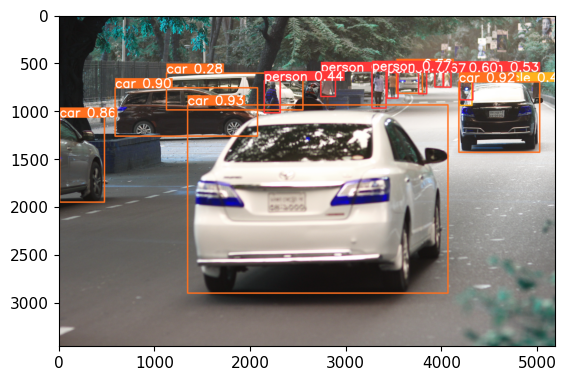

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

### Training the yolov5 model with the custom dataset
##### !cd yolov5 && python train.py --img 320 --batch 8 --epochs 10 --data data.yaml --weights yolov5s.pt --workers 2

In [42]:
!cd yolov5 && python train.py --batch 8 --epochs 200 --data data.yaml --weights yolov5s.pt --workers 4

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=4, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 10 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-230-g53efd07f Python-3.9.13 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24254MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0

In [43]:
model01 = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp12/weights/best.pt')

Using cache found in /home/anim/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-18 Python-3.9.13 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24254MiB)

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients
Adding AutoShape... 


### Testing the newly trained model

In [49]:
image = cv2.imread('7139513_b.png')
result = model01(image)
result.print()

image 1/1: 420x500 1 BAR_CODE, 1 ADDRESS, 1 BLOOD_GROUP, 1 PLACE_OF_BIRTH, 1 ISSUE_DATE, 1 UNIQUE_CODE
Speed: 7.5ms pre-process, 62.4ms inference, 0.9ms NMS per image at shape (1, 3, 544, 640)


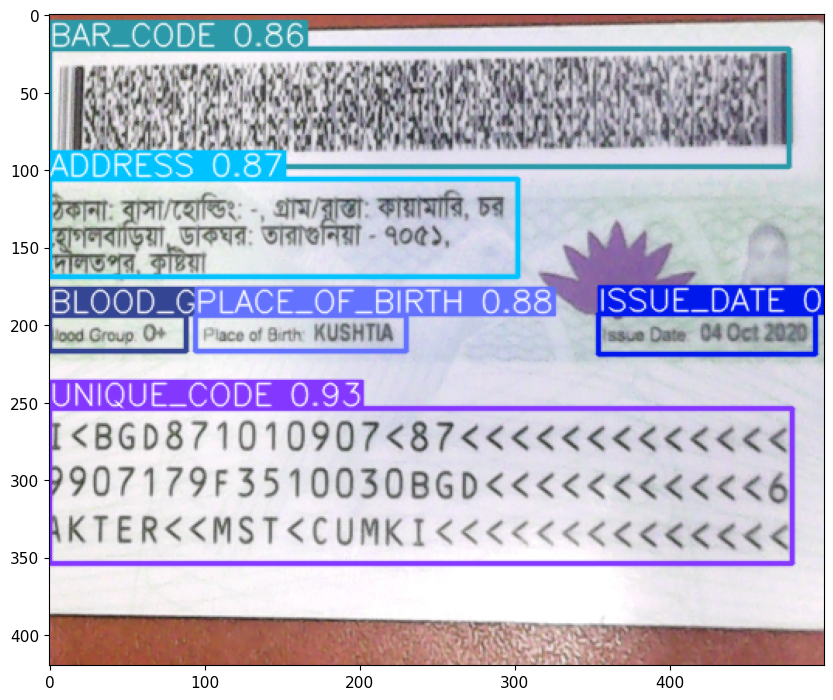

In [50]:
%matplotlib inline 
fig = plt.figure(figsize=(10, 10))
plt.imshow(np.squeeze(result.render()))
plt.show()

import os
import shutil

source_dir = "data_to_label/NID_NEW_FRONT/"
destination_dir = "data_to_label/NID_NEW_FRONT_rename/"

file_list = os.listdir(source_dir)

for filename in file_list:
    if filename.endswith(".png"):  # Change the file extension to match your image format
        base_name, extension = os.path.splitext(filename)
        new_filename = base_name + "_f" + extension

        source_path = os.path.join(source_dir, filename)
        destination_path = os.path.join(destination_dir, new_filename)

        shutil.move(source_path, destination_path)
        print(f'Renamed and saved: {new_filename}')
